In [6]:
# imports
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


In [4]:
np.random.randint(0,1000, (3,3))

array([[358, 215, 108],
       [ 54, 495, 829],
       [ 40, 469, 356]])

In [5]:
np.random.normal(loc=0.0, scale=1.0, size=(3,3))

array([[ 0.9958787 ,  0.4737051 , -2.01935321],
       [ 1.22364944, -0.75672618, -0.31482683],
       [-0.80086576,  0.11405749,  0.60216959]])

In [5]:
np.random.randn(3,3)

array([[-0.44542864,  0.62176087, -0.56484763],
       [-1.17734253,  0.57223143, -0.46637451],
       [-2.19383292, -0.53823895, -0.35788736]])

In [6]:
r1, r2 = np.random.randn(2)
print(r1,r2)

-0.4863156614026735 0.7629135605453514


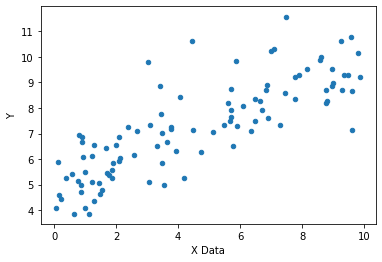

In [6]:
# ----------------
# neural network (example 4) (linear regression)
# ----------------

# create x and y data for points
x_data = np.linspace(0.0, 10.0, 10000)
noise = np.random.randn(len(x_data))
y_actual = (0.5 * x_data) + 5 + noise
# create df
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_actual,columns=['Y'])
my_data=pd.concat([x_df,y_df], axis=1) # concatenate as columns (not more rows)
# plot sample
sample = my_data.sample(n=100) # return sample (100 random rows)
sample.plot(kind='scatter',x='X Data',y='Y')

0.49350056 4.934874


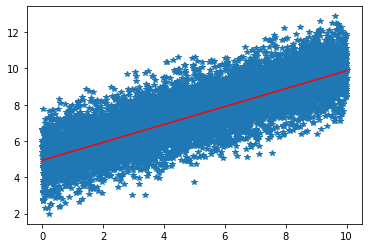

In [7]:
# y = mx + b
batch_size = 8
r1, r2 = np.random.randn(2)
m = tf.Variable(r1, dtype=tf.float32)
b = tf.Variable(r2, dtype=tf.float32)
# placeholders
x_ph = tf.placeholder(tf.float32,[batch_size])
y_ph = tf.placeholder(tf.float32,[batch_size])
y_model = m * x_ph + b
error = tf.reduce_sum(tf.square(y_ph - y_model)) # reduce_sum: sum of array
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
# execute
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(low=0,high=len(x_data),size=batch_size) # array: 8 random indices
        feed = {x_ph:x_data[rand_ind],y_ph:y_actual[rand_ind]} # feed_dict
        sess.run(train,feed_dict=feed)
    model_m, model_b = sess.run([m,b])
    print(model_m, model_b)
# test
y_pred_plot = model_m*x_data + model_b
plt.plot(x_data, y_actual, '*') # data points (actual)
plt.plot(x_data, y_pred_plot, 'r') # y-hat line (prediction)

W0723 20:31:49.377371 140282921617216 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp_i6p0utw


(7000,)
(3000,)
TRAINING DATA METRICS
{'average_loss': 1.1016291, 'label/mean': 7.5203166, 'loss': 8.813033, 'prediction/mean': 7.4330816, 'global_step': 1000}
EVAL METRICS
{'average_loss': 1.0707654, 'label/mean': 7.5076437, 'loss': 8.566123, 'prediction/mean': 7.4105806, 'global_step': 1000}
[array([4.483318], dtype=float32), array([5.136224], dtype=float32), array([5.78913], dtype=float32), array([6.4420357], dtype=float32), array([7.094942], dtype=float32), array([7.7478476], dtype=float32), array([8.400754], dtype=float32), array([9.053659], dtype=float32), array([9.706566], dtype=float32), array([10.359472], dtype=float32)]


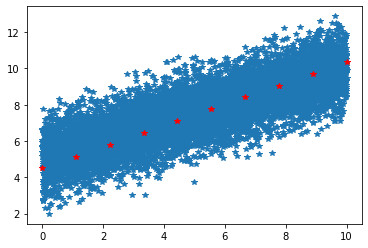

In [26]:
# ----------------
# tf.estimator
# ----------------

# data
x_data = np.linspace(0.0, 10.0, 10000)
y_actual = (0.5 * x_data) + 5 + noise
feat_cols = [ tf.feature_column.numeric_column(key='x', shape=[1]) ]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)
# import
from sklearn.model_selection import train_test_split
# train_test_split
x_train, x_eval, y_train, y_eval = train_test_split(
    x_data, y_actual, test_size=0.3, random_state=101
)
print(x_train.shape)
print(x_eval.shape)
# input func, train input func, eval input func
input_func = tf.estimator.inputs.numpy_input_fn(
    x={'x': x_train}, y=y_train, batch_size=8, num_epochs=None, shuffle=True
)
train_input_func = tf.estimator.inputs.numpy_input_fn(
    x={'x': x_train}, y=y_train, batch_size=8, num_epochs=1000, shuffle=False
)
eval_input_func = tf.estimator.inputs.numpy_input_fn(
    x={'x': x_eval}, y=y_eval, batch_size=8, num_epochs=1000, shuffle=False
)

# train, evaluate
estimator.train(input_fn=input_func, steps=1000)
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)
print('TRAINING DATA METRICS')
print(train_metrics)
print('EVAL METRICS')
print(eval_metrics)

# predict
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn(
    x={'x': brand_new_data}, shuffle=False
)
predictions = list(estimator.predict(input_fn=input_fn_predict))
predictions = list(map(lambda x: x['predictions'], predictions))
print(predictions)

# plot
plt.plot(x_data, y_actual, '*')
plt.plot(brand_new_data, predictions, 'r*')

W0724 09:55:21.036237 140611282274112 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpw84_k8w0
W0724 09:55:25.473623 140611282274112 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 8 vs previous value: 8. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.
W0724 09:55:25.535038 140611282274112 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 25 vs previous value: 25. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.
W0724 09:55:25.587441 140611282274112 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 38 vs previous value: 38. You could increas

{'accuracy': 0.7056277, 'accuracy_baseline': 0.64935064, 'auc': 0.7884362, 'auc_precision_recall': 0.6212008, 'average_loss': 0.5575835, 'label/mean': 0.35064936, 'loss': 5.366741, 'precision': 0.6585366, 'prediction/mean': 0.36347124, 'recall': 0.33333334, 'global_step': 1000}
[{'logits': array([-0.5694932], dtype=float32), 'logistic': array([0.36135378], dtype=float32), 'probabilities': array([0.63864625, 0.36135378], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.01556659], dtype=float32), 'logistic': array([0.5038916], dtype=float32), 'probabilities': array([0.49610844, 0.5038916 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.6733551], dtype=float32), 'logistic': array([0.33774602], 

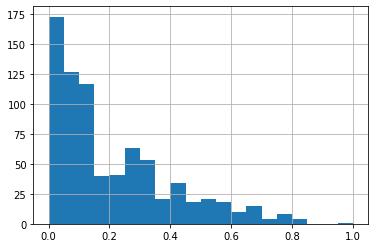

In [10]:

# ----------------
# tf.estimator (classification)
# ----------------

# create df from csv
df1 = pd.read_csv('pima-indians-diabetes.csv')
df1.head()
# normalize
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps', 'Insulin', 'BMI', 'Pedigree', 'Age']
df1[cols_to_norm] = df1[cols_to_norm].apply( lambda x: (x - x.min()) / (x.max() - x.min()) )
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')
# group
unique_group_values = df1['Group'].unique()
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',unique_group_values)
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10) # automatic, up to 10
# continuous to categorical column (feature engineering)
df1['Age'].hist(bins=20) # show histogram
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80,90])
# feature columns
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, age]
# class
x_data = df1.drop('Class',axis=1) # drop 'Class' column
labels = df1['Class'] # diabetes boolean
# train test split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, labels, test_size=0.3, random_state=101
)
# input func
input_func = tf.estimator.inputs.pandas_input_fn(
    x=x_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True
)
# model
model = tf.estimator.LinearClassifier(
    feature_columns=feat_cols, n_classes=2
)
# train model
model.train(input_fn=input_func, steps=1000)
# eval
eval_input_func = tf.estimator.inputs.pandas_input_fn(
    x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False
)
results = model.evaluate(eval_input_func)
print(results)

# predict
pred_input_func = tf.estimator.inputs.pandas_input_fn(
    x=x_test, batch_size=10, num_epochs=1, shuffle=False
)
predictions = list(model.predict(pred_input_func))
print(predictions)

W0724 10:14:08.458525 140611282274112 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp57udtrbm
W0724 10:14:20.267911 140611282274112 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0724 10:14:20.313454 140611282274112 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83238685,
 'auc_precision_recall': 0.73241544,
 'average_loss': 0.47908825,
 'label/mean': 0.35064936,
 'loss': 4.6112247,
 'precision': 0.6666667,
 'prediction/mean': 0.38274047,
 'recall': 0.6666667,
 'global_step': 1000}

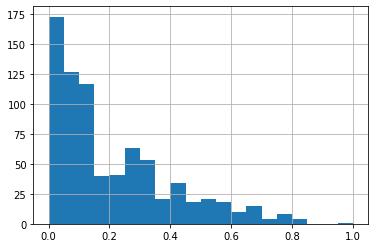

In [13]:
# ----------------
# tf.estimator (dnn classifier)
# ----------------

# create df from csv
df1 = pd.read_csv('pima-indians-diabetes.csv')
df1.head()
# normalize
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps', 'Insulin', 'BMI', 'Pedigree', 'Age']
df1[cols_to_norm] = df1[cols_to_norm].apply( lambda x: (x - x.min()) / (x.max() - x.min()) )
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')
# group
unique_group_values = df1['Group'].unique()
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',unique_group_values)
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10) # automatic, up to 10
# continuous to categorical column (feature engineering)
df1['Age'].hist(bins=20) # show histogram
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80,90])
# dnn -- categorical column needs embedding_column
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]
# input func
input_func = tf.estimator.inputs.pandas_input_fn(
    x_train, y_train, batch_size=10, num_epochs=1000, shuffle=True
)
# DNN classifier (model) (won't work)
dnn_model = tf.estimator.DNNClassifier(
    hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2
)
# train 
dnn_model.train(input_fn=input_func, steps=1000)

In [22]:
# ----------------
# tf.estimator (DNN regressor)
# ----------------

# df
df1 = pd.read_csv('cal_housing_clean.csv')
# prepare for split
x_data = df1.drop('medianHouseValue', axis=1)
y_val = df1['medianHouseValue']
# split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_val, test_size=0.3, random_state=101
)
# scaler (values 0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(
    data=scaler.transform(x_train), columns=x_train.columns, index=x_train.index
)
x_test = pd.DataFrame(
    data=scaler.transform(x_test), columns=x_test.columns, index=x_test.index
)
# feature columns (conversion)
age = tf.feature_column.numeric_column('housingMedianAge')
rooms = tf.feature_column.numeric_column('totalRooms')
bedrooms = tf.feature_column.numeric_column('totalBedrooms')
pop = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
income = tf.feature_column.numeric_column('medianIncome')
# feature columns
feat_cols = [age, rooms, bedrooms, pop, households, income]
# input func
input_func = tf.estimator.inputs.pandas_input_fn(
    x=x_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True
)
# model
model = tf.estimator.DNNRegressor(hidden_units=[6,6,6], feature_columns=feat_cols)
# train
model.train(input_fn=input_func, steps=20000)
# predict
predict_input_func = tf.estimator.inputs.pandas_input_fn(
    x=x_test, batch_size=10, num_epochs=1, shuffle=False
)
predictions = list(model.predict(predict_input_func))
predictions = list(map(lambda x: x['predictions'][0], predictions)) # get value out of dict/array
# print(predictions)

# rmse -- sklearn.metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = mse ** (1/2)
print(rmse)

W0724 10:59:10.925110 140611282274112 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpar5vfklm


84959.98574345479


In [25]:
# ----------------
# tf.estimator (linear classifier 2)
# ----------------

# df
df1 = pd.read_csv('census_data.csv')
# convert to boolean
df1['income_bracket'].unique() 
df1['income_bracket'] = df1['income_bracket'].apply(lambda x: 0 if x==' <=50K' else 1)
# prepare for split
x_data = df1.drop('income_bracket', axis=1)
y_labels = df1['income_bracket']
# split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_labels, test_size=0.3, random_state=101
)
# categorical feature columns
gender = tf.feature_column.categorical_column_with_vocabulary_list('gender',['Female','Male'])
occupation = tf.feature_column.categorical_column_with_hash_bucket('occupation', hash_bucket_size=1000)
marital_status = tf.feature_column.categorical_column_with_hash_bucket('marital_status', hash_bucket_size=1000)
relationship = tf.feature_column.categorical_column_with_hash_bucket('relationship', hash_bucket_size=1000)
education = tf.feature_column.categorical_column_with_hash_bucket('education', hash_bucket_size=1000)
workclass = tf.feature_column.categorical_column_with_hash_bucket('workclass', hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket('native_country', hash_bucket_size=1000)
# continuous feature columns
age = tf.feature_column.numeric_column('age')
education_num = tf.feature_column.numeric_column('education_num')
capital_gain = tf.feature_column.numeric_column('capital_gain')
capital_loss = tf.feature_column.numeric_column('capital_loss')
hours_per_week = tf.feature_column.numeric_column('hours_per_week')
# feature columns
feat_cols = [
    gender,occupation,marital_status,relationship,education,
    workclass,native_country,age,education_num,capital_gain,
    capital_loss,hours_per_week
]
# input function
input_func = tf.estimator.inputs.pandas_input_fn(
    x=x_train,y=y_train,batch_size=100,num_epochs=None,shuffle=True
)
# model
model = tf.estimator.LinearClassifier(feature_columns=feat_cols)
# train
model.train(input_fn=input_func, steps=10000)
# eval/predict
pred_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_test, batch_size=len(x_test), shuffle=False
)
predictions = list(model.predict(input_fn=pred_fn))
predictions = list(map(lambda x: x['class_ids'][0], predictions))

# classification report (sklearn.metrics)
from sklearn.metrics import classification_report

report = classification_report(y_true=y_test, y_pred=predictions)
print(report)

W0724 11:50:11.901000 140611282274112 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpad6aao4t


              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7436
           1       0.67      0.41      0.51      2333

    accuracy                           0.81      9769
   macro avg       0.75      0.67      0.70      9769
weighted avg       0.80      0.81      0.79      9769



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


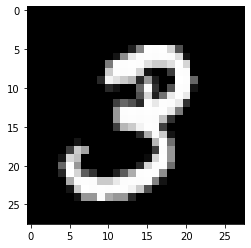

In [4]:
# download dataset
# from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
# examine dataset
mnist.train.images # array
mnist.train.num_examples # 55000
mnist.test.num_examples # 10000
mnist.train.images.shape # 55000 784
img1 = mnist.train.images[1].reshape(28,28) # image as array
plt.imshow(img1, cmap='gray') # plot image

In [7]:
# ----------------
# CNN (mnist)
# ----------------

# import steps for 'mnist' above.

# helper
# init weights
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, mean=0, stddev=0.1)
    return tf.Variable(init_random_dist)
# init bias
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)
# conv2d
def conv2d(x,W):
    # x -- neuron -- [batch, h, w, channels]
    # W -- kernel -- [filter_h, filter_w, channels_in, channels_out]
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
# pooling
def max_pool_2by2(x):
    # x -- neuron -- [batch, h, w, channels]
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
# convolutional layer
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W) + b) # activation function
# normal (fully connected)
def normal_full_layer(input_layer,size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size,size])
    b = init_bias([size])
    return tf.matmul(input_layer,W) + b

# placeholders
x = tf.placeholder(tf.float32, shape=[None, 784]) # batch size, image size
y_true = tf.placeholder(tf.float32, shape=[None, 10]) # batch size, possible labels
# layers
x_image = tf.reshape(x, [-1,28,28,1]) # reshape flattened array back to image array
# conv layer 1 (compute 32 features or each 5x5 patch)
convo_1 = convolutional_layer(x_image, shape=[5,5,1,32])
# pooling 1 (2x2)
convo_1_pooling = max_pool_2by2(convo_1)
# conv layer 2
convo_2 = convolutional_layer(convo_1_pooling, shape=[5,5,32,64])
# pooling 2 (2x2)
convo_2_pooling = max_pool_2by2(convo_2)
# flatten (prepare for fully connected layer) (7x7 image, 64 features?)
convo_2_flat = tf.reshape(convo_2_pooling, [-1, 7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat, 1024)) # layer, neurons
# dropout
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)
y_pred = normal_full_layer(full_one_dropout, 10) # layer, # of labels

# loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    labels=y_true, logits=y_pred
))
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)
# session
init = tf.global_variables_initializer()
steps = 500 # 5000 for better results
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        batch_x, batch_y = mnist.train.next_batch(50) # 50 images per batch
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y, hold_prob:0.5})
        if i%100 == 0:
            matches = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1)) # list of booleans (match)
            acc = tf.reduce_mean(tf.cast(matches, tf.float32)) # cast list of booleans to 1,0. get average
            acc_report = sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels, hold_prob:1.0 })
            print(f"on step: {i}")
            print(f"accuracy: {acc_report}",'\n')

on step: 0
accuracy: 0.12309999763965607 

on step: 100
accuracy: 0.9302999973297119 

on step: 200
accuracy: 0.9483000040054321 

on step: 300
accuracy: 0.9675999879837036 

on step: 400
accuracy: 0.9700999855995178 



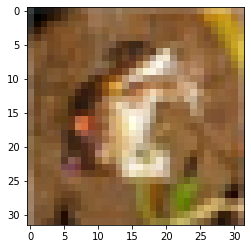

In [8]:

# ----------------
# CNN (CIFAR-10) (dataset)
# ----------------

# download dataset

# 60k colors images, 10 classes, 6k images/class, 50k train, 10k test
# creating tensor batches is the difficulty here
import pickle
import os
def unpickle(file):
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict
cifar_dir = './cifar-10-batches-py/'
fn_all = ['batches.meta', 'data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']
### all_data = [0,1,2,3,4,5,6] # only needed if using 'zip' instead of 'enumerate'
all_data = []
for i, fn in enumerate(fn_all):
    fp = os.path.join(cifar_dir, fn)
    all_data.append(unpickle(fp))

# batch_meta
    # dict: keys -- 'label_names','num_cases_per_batch','num_vis'
# data_batch
    # dict: keys -- 'data','labels' 
    # data -- 10k x 3072 np.array uint8
        # each row is a 32x32 image, RGB Channels (32x32x3)
    # labels -- list of 10k nums (0-9)

batch_meta = all_data[0] 
data_batch1 = all_data[1] 
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_data = all_data[6]

# reshape (10k images, 3 channels, 32x32) (10k images, 32x32, 3 channels)
db1 = data_batch1[b'data']
db1 = db1.reshape(10000, 3, 32, 32).transpose(0,3,2,1).astype('uint8') 
plt.imshow(db1[0]) # show image (plt understands this shape)


In [22]:

# ----------------
# CNN (CIFAR-10) (functions and classes)
# ----------------

# helper functions
def one_hot_encode(vec, vals=10):
    # for use to one-hot encode the 10 possible labels
    n = len(vec)
    out = np.zeros((n,vals))
    out[range(n), vec] = 1
    return out

class CifarHelper():
    def __init__(self):
        self.i = 0
        # grabs a list of all the data batches for training
        self.all_train_batches = [data_batch1, data_batch2, data_batch3, data_batch4, data_batch5 ]
        self.test_batch = [test_data]
        # initialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        self.test_images = None
        self.test_labels = None

    def set_up_images(self):
        # TRAIN
        print('setting up training images and labels')
        # vertically stack training images
        self.training_images = np.vstack([d[b'data'] for d in self.all_train_batches])
        train_len = len(self.training_images)
        # reshape and normalize
        self.training_images = self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        # one hot encode the training labels (ie [0,0,0,1,0,0,0,0,0,0])
        self.training_labels = one_hot_encode(np.hstack([d[b'labels'] for d in self.all_train_batches]))
        # TEST
        print('setting up test images and labels')
        # vertically stack test images
        self.test_images = np.vstack([d[b'data'] for d in self.test_batch])
        train_len = len(self.test_images)
        # reshape and normalize
        self.test_images = self.test_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        # one hot encode the training labels (ie [0,0,0,1,0,0,0,0,0,0])
        self.test_labels = one_hot_encode(np.hstack([d[b'labels'] for d in self.test_batch]))

    def next_batch(self, batch_size):
        # note that the 100 dimension in the reshape call is set by an assumed batch size of 100
        x = self.training_images[self.i:self.i+batch_size].reshape(100,32,32,3)
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y


In [20]:

# ----------------
# CNN (CIFAR-10) (model)
# ----------------

# placeholders
x = tf.placeholder(tf.float32,shape=[None,32,32,3]) # batch size, 32x32, 3 channels
y_true = tf.placeholder(tf.float32,shape=[None,10]) # batch size, labels (one-hot-encoded)
hold_prob = tf.placeholder(tf.float32)

# helper functions
# init weights
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, mean=0, stddev=0.1)
    return tf.Variable(init_random_dist)
# init bias
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)
# conv2d
def conv2d(x,W):
    # x -- neuron -- [batch, h, w, channels]
    # W -- kernel -- [filter_h, filter_w, channels_in, channels_out]
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
# pooling
def max_pool_2by2(x):
    # x -- neuron -- [batch, h, w, channels]
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
# convolutional layer
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W) + b) # activation function
# normal (fully connected)
def normal_full_layer(input_layer,size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size,size])
    b = init_bias([size])
    return tf.matmul(input_layer,W) + b

# create layers
convo_1 = convolutional_layer(x,shape=[4,4,3,32]) # 4x4, 3 channels, 32 features
convo_1_pooling = max_pool_2by2(convo_1)
convo_2 = convolutional_layer(convo_1_pooling, shape=[4,4,32,64]) 
convo_2_pooling = max_pool_2by2(convo_2)
# flat layer
convo_2_flat = tf.reshape(convo_2_pooling, [-1,8*8*64])
# normal full layer (1024 neurons) (relu = max(0,x))
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))
# dropout layer
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)
y_pred = normal_full_layer(full_one_dropout, 10) # 10 neurons, 10 possible labels
# loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    labels=y_true, logits=y_pred
))
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
# train
train = optimizer.minimize(cross_entropy)


In [24]:

# ----------------
# CNN (CIFAR-10) (session)
# ----------------

# instantiate class
ch = CifarHelper()
# set up images
ch.set_up_images()

# init global variables
init = tf.global_variables_initializer()
steps = 500 # better results at 5000
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps + 1):
        batch = ch.next_batch(100) # returns x,y (input images, output labels)
        sess.run(train, feed_dict={x:batch[0], y_true:batch[1], hold_prob:0.5})
        if i % 100 == 0:
            print(f"step: {i}")
            matches = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1)) # equal?
            acc = tf.reduce_mean(tf.cast(matches,tf.float32)) # cast booleans to 1,0. get average
            acc_report = sess.run(acc,feed_dict={x:ch.test_images,y_true:ch.test_labels,hold_prob:1.0})
            print(f"accuracy: {acc_report}",'\n')


setting up training images and labels
setting up test images and labels
step: 0
accuracy: 0.10040000081062317 

step: 100
accuracy: 0.39089998602867126 

step: 200
accuracy: 0.4456999897956848 

step: 300
accuracy: 0.4975000023841858 

step: 400
accuracy: 0.5120999813079834 

step: 500
accuracy: 0.5504999756813049 

